# Understanding High-pass Filter

This is a jupyter notebook to understand how high-pass filter works

In [2]:
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt
%matplotlib inline

### Step 1: Generate the mocked sigmals

Text(0, 0.5, 'Amplitude')

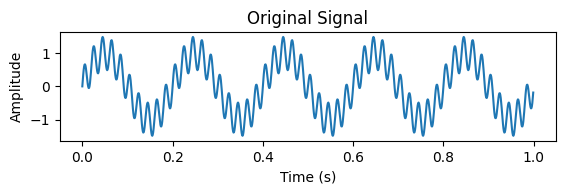

In [6]:
# Parameters
fs = 1000  # Sampling frequency (Hz)
t = np.arange(0, 1, 1/fs)  # Time vector

# Generate a signal (sum of sinusoids)
f1 = 5   # Low-frequency component (Hz)
f2 = 50  # High-frequency component (Hz)
signal = np.sin(2*np.pi*f1*t) + 0.5*np.sin(2*np.pi*f2*t)

# Plot the original signal in time domain
plt.subplot(3, 1, 1)
plt.plot(t, signal)
plt.title('Original Signal')
plt.xlabel('Timbe (s)')
plt.ylabel('Amplitude')

### Step 2: Plot the original spectrum

Text(0, 0.5, 'Magnitude')

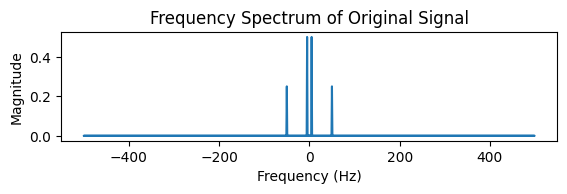

In [21]:
# Compute the frequency spectrum of the original signal
N = len(signal)
frequencies = np.fft.fftfreq(N, 1/fs)
spectrum = np.fft.fft(signal,norm='forward')

# Plot the original signal's frequency spectrum
plt.subplot(3, 1, 2)
plt.plot(frequencies, np.abs(spectrum))
plt.title('Frequency Spectrum of Original Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
#print(np.around(np.abs(spectrum), decimals=2))
#print(frequencies)

### Step 3: Apply the high-pass filter

In [8]:
# Apply a high-pass filter (example using a Butterworth filter)
fc = 10   # Cutoff frequency of the high-pass filter (Hz)
order = 4  # Filter order
b, a = butter(order, fc/(fs/2), btype='high')
filtered_signal = filtfilt(b, a, signal)

### Step 4: Plot the post-processed signal

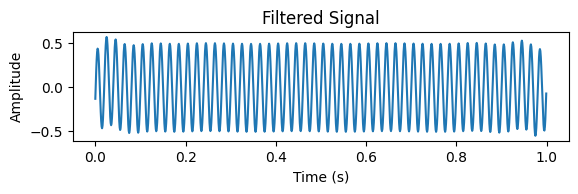

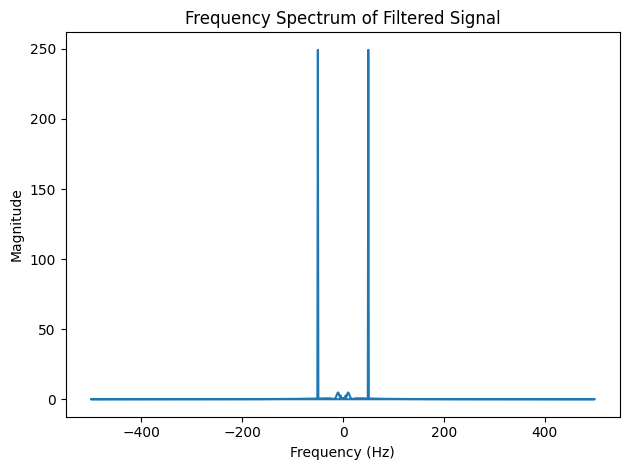

In [9]:
# Plot the filtered signal in time domain
plt.subplot(3, 1, 3)
plt.plot(t, filtered_signal)
plt.title('Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Compute the frequency spectrum of the filtered signal
filtered_spectrum = np.fft.fft(filtered_signal)

# Plot the filtered signal's frequency spectrum
plt.figure()
plt.plot(frequencies, np.abs(filtered_spectrum))
plt.title('Frequency Spectrum of Filtered Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

[5.+0.j 0.-1.j 3.+0.j 0.+1.j]
[ 0.  1. -2. -1.]


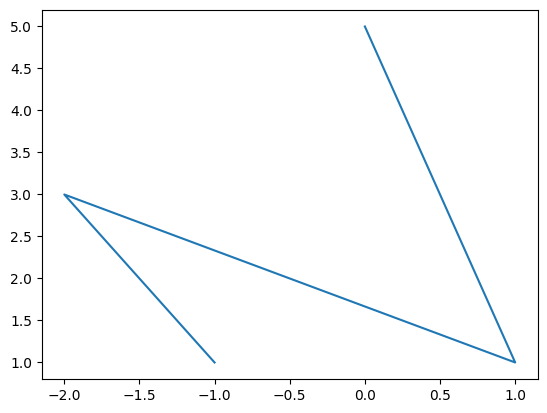

In [18]:
#data = np.array([8.,4.,8.,0.])
#print(np.fft.fft(data,norm='forward'))
#print(np.fft.fftfreq(n=4,d=0.25))
#plt.plot(np.fft.fftfreq(n=4,d=0.25), np.abs(np.fft.fft(data,norm='forward')))

### Step 5: Compare the effect of different high-pass filters.

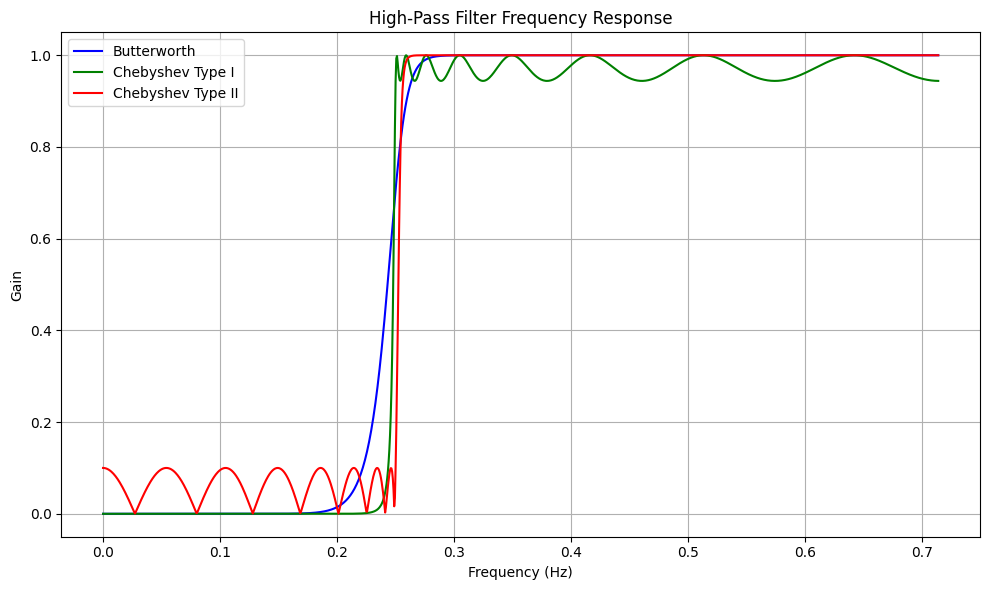

'\n# Design filters\nb_butter, a_butter = butter(order, cutoff_freq / nyquist, btype=\'high\')\nb_cheby1, a_cheby1 = cheby1(order, 0.5, cutoff_freq / nyquist, btype=\'high\')\nb_cheby2, a_cheby2 = cheby2(order, 20, cutoff_freq / nyquist, btype=\'high\')\nb_ellip, a_ellip = ellip(order, 0.5, 20, cutoff_freq / nyquist, btype=\'high\')\n\n# Frequency response\nw, h_butter = freqz(b_butter, a_butter, worN=N, fs=fs)\n_, h_cheby1 = freqz(b_cheby1, a_cheby1, worN=N, fs=fs)\n_, h_cheby2 = freqz(b_cheby2, a_cheby2, worN=N, fs=fs)\n_, h_ellip = freqz(b_ellip, a_ellip, worN=N, fs=fs)\n\n# Plotting\nplt.figure(figsize=(10, 6))\n\nplt.plot(0.5 * fs * w / np.pi, np.abs(h_butter), \'b\', label=\'Butterworth\')\nplt.plot(0.5 * fs * w / np.pi, np.abs(h_cheby1), \'g\', label=\'Chebyshev Type I\')\nplt.plot(0.5 * fs * w / np.pi, np.abs(h_cheby2), \'r\', label=\'Chebyshev Type II\')\nplt.plot(0.5 * fs * w / np.pi, np.abs(h_ellip), \'m\', label=\'Elliptic\')\n\nplt.title("High-Pass Filter Frequency Respons

In [24]:
from scipy.signal import butter, cheby1, cheby2, ellip, freqz

# Parameters
N = 1200  # Number of time points
T = 0.7  # Time resolution (seconds)
fs = 1 / T  # Sampling frequency
nyquist = 0.5 * fs  # Nyquist frequency

# Filter design
cutoff_freq = 0.25  # Cutoff frequency (Hz)
order = 16  # Filter order

# Design filters
b_butter, a_butter = butter(order, cutoff_freq, btype='highpass',fs=fs)
b_cheby1, a_cheby1 = cheby1(order, 0.5, cutoff_freq, btype='highpass',fs=fs)
b_cheby2, a_cheby2 = cheby2(order, 20, cutoff_freq, btype='highpass',fs=fs)
#b_ellip, a_ellip = ellip(order, 0.5, 20, cutoff_freq, btype='highpass',fs=fs)

# Frequency response
w, h_butter = freqz(b_butter, a_butter, worN=N, fs=fs)
_, h_cheby1 = freqz(b_cheby1, a_cheby1, worN=N, fs=fs)
_, h_cheby2 = freqz(b_cheby2, a_cheby2, worN=N, fs=fs)
#_, h_ellip = freqz(b_ellip, a_ellip, worN=N, fs=fs)

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(w, np.abs(h_butter), 'b', label='Butterworth')
plt.plot(w, np.abs(h_cheby1), 'g', label='Chebyshev Type I')
plt.plot(w, np.abs(h_cheby2), 'r', label='Chebyshev Type II')
#plt.plot(w, np.abs(h_ellip), 'm', label='Elliptic')

plt.title("High-Pass Filter Frequency Response")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

'''
# Design filters
b_butter, a_butter = butter(order, cutoff_freq / nyquist, btype='high')
b_cheby1, a_cheby1 = cheby1(order, 0.5, cutoff_freq / nyquist, btype='high')
b_cheby2, a_cheby2 = cheby2(order, 20, cutoff_freq / nyquist, btype='high')
b_ellip, a_ellip = ellip(order, 0.5, 20, cutoff_freq / nyquist, btype='high')

# Frequency response
w, h_butter = freqz(b_butter, a_butter, worN=N, fs=fs)
_, h_cheby1 = freqz(b_cheby1, a_cheby1, worN=N, fs=fs)
_, h_cheby2 = freqz(b_cheby2, a_cheby2, worN=N, fs=fs)
_, h_ellip = freqz(b_ellip, a_ellip, worN=N, fs=fs)

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(0.5 * fs * w / np.pi, np.abs(h_butter), 'b', label='Butterworth')
plt.plot(0.5 * fs * w / np.pi, np.abs(h_cheby1), 'g', label='Chebyshev Type I')
plt.plot(0.5 * fs * w / np.pi, np.abs(h_cheby2), 'r', label='Chebyshev Type II')
plt.plot(0.5 * fs * w / np.pi, np.abs(h_ellip), 'm', label='Elliptic')

plt.title("High-Pass Filter Frequency Response")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
'''

### Step 6: Testing

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.signal import butter, cheby1, cheby2, ellip, freqz

In [26]:
# Specify the parameters of fMRI signal
N = 1200  # Number of time points
T = 0.7  # Time resolution (seconds)
fs = 1 / T  # Sampling frequency
nyquist = 0.5 * fs  # Nyquist frequency

In [27]:
# Filter design
cutoff_freq = 0.25  # Cutoff frequency (Hz)
order = 32  # Filter order

# Design filters
b_butter, a_butter = butter(order, cutoff_freq, btype='highpass',fs=fs)

In [28]:
# Original signal
ff_1 = np.linspace(0.1,0.2,6)
ff_2 = np.linspace(0.05,0.2,4)
signal_1 = np.zeros(N)
signal_2 = np.zeros(N)
t = np.array([i * T for i in range(N)])

#for i,f in enumerate(ff_1):
#    signal_1 += np.sin(2*np.pi * f * t + np.pi / 3 * i)
signal_1 = np.sin(2 * np.pi * 0.2 * t)
signal_2 = np.sin(2 * np.pi * 0.3 * t)
#for i,f in enumerate(ff_2):
#    signal_2 += np.sin(2*np.pi * f * t + np.pi / 3 * i)

signals = np.array([signal_1,signal_2])

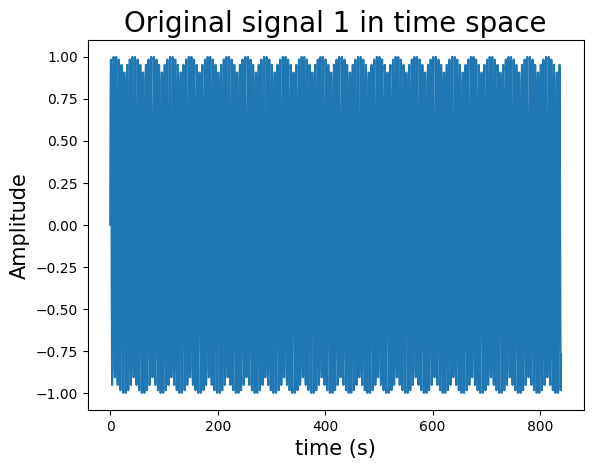

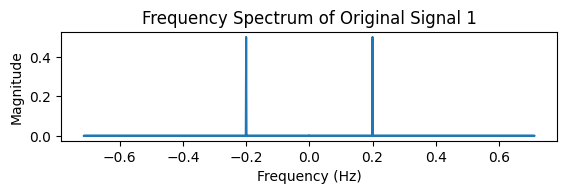

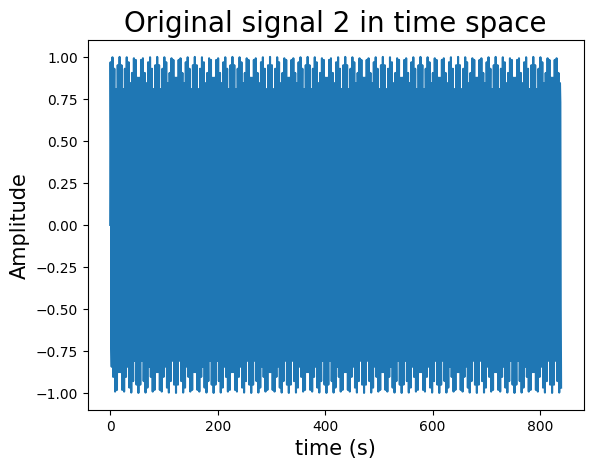

Text(0, 0.5, 'Magnitude')

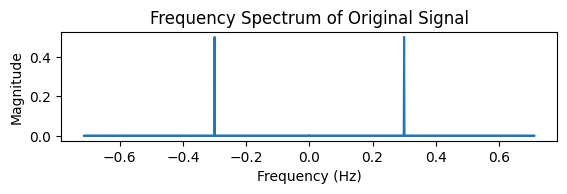

In [29]:
# Plot the signal in time space and frequency space
plt.plot(t,signals[0,:])
plt.xlabel('time (s)',fontsize=15)
plt.ylabel('Amplitude',fontsize=15)
plt.title('Original signal 1 in time space',fontsize=20)
plt.show()

frequencies = np.fft.fftfreq(N, 1/fs)
spectrum = np.fft.fft(signals[0,:],norm='forward')

# Plot the original signal's frequency spectrum
plt.subplot(3, 1, 2)
plt.plot(frequencies, np.abs(spectrum))
plt.title('Frequency Spectrum of Original Signal 1')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

# Plot the signal in time space and frequency space
plt.plot(t,signals[1,:])
plt.xlabel('time (s)',fontsize=15)
plt.ylabel('Amplitude',fontsize=15)
plt.title('Original signal 2 in time space',fontsize=20)
plt.show()

frequencies = np.fft.fftfreq(N, 1/fs)
spectrum = np.fft.fft(signals[1,:],norm='forward')

# Plot the original signal's frequency spectrum
plt.subplot(3, 1, 2)
plt.plot(frequencies, np.abs(spectrum))
plt.title('Frequency Spectrum of Original Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

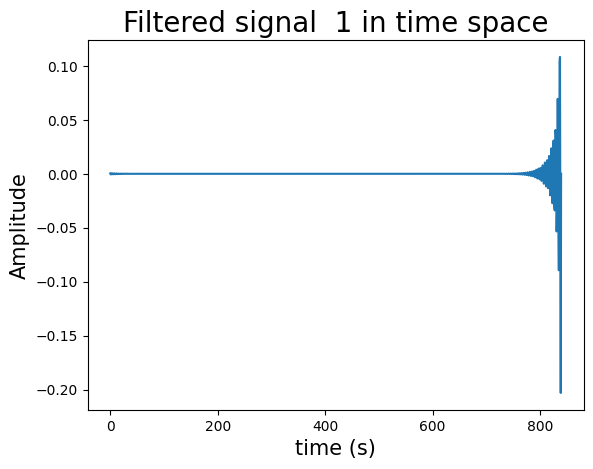

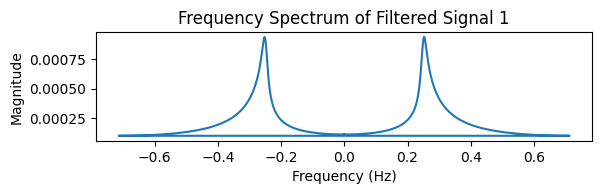

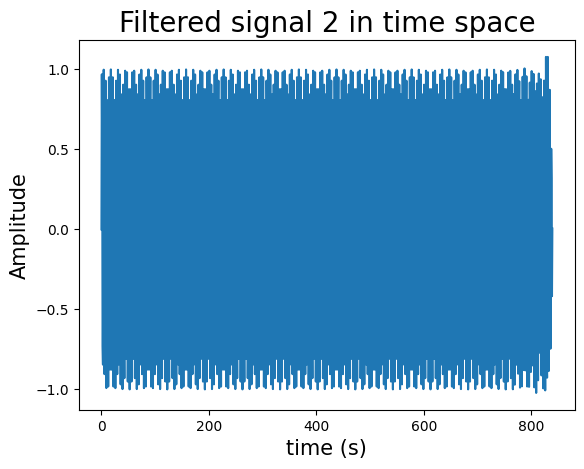

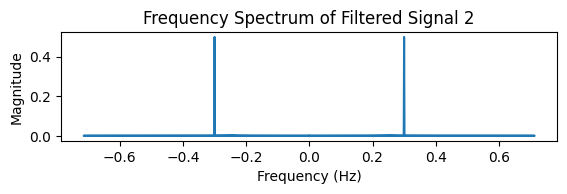

In [30]:
# Filter and plot again
filtered_signals = filtfilt(b_butter, a_butter, signals)

plt.plot(t,filtered_signals[0,:])
plt.xlabel('time (s)',fontsize=15)
plt.ylabel('Amplitude',fontsize=15)
plt.title('Filtered signal  1 in time space',fontsize=20)
plt.show()

frequencies = np.fft.fftfreq(N, 1/fs)
spectrum = np.fft.fft(filtered_signals[0,:],norm='forward')

# Plot the filtered signal's frequency spectrum
plt.subplot(3, 1, 2)
plt.plot(frequencies, np.abs(spectrum))
plt.title('Frequency Spectrum of Filtered Signal 1')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

plt.plot(t,filtered_signals[1,:])
plt.xlabel('time (s)',fontsize=15)
plt.ylabel('Amplitude',fontsize=15)
plt.title('Filtered signal 2 in time space',fontsize=20)
plt.show()

frequencies = np.fft.fftfreq(N, 1/fs)
spectrum = np.fft.fft(filtered_signals[1,:],norm='forward')

# Plot the filtered signal's frequency spectrum
plt.subplot(3, 1, 2)
plt.plot(frequencies, np.abs(spectrum))
plt.title('Frequency Spectrum of Filtered Signal 2')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()
